In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import statsmodels.formula.api as sm

# Loading Data 

In [4]:
df=pd.read_csv('Advertising.csv',delimiter=',')
df.drop(labels='Unnamed: 0',axis=1,inplace=True)


# Plotting the Data 

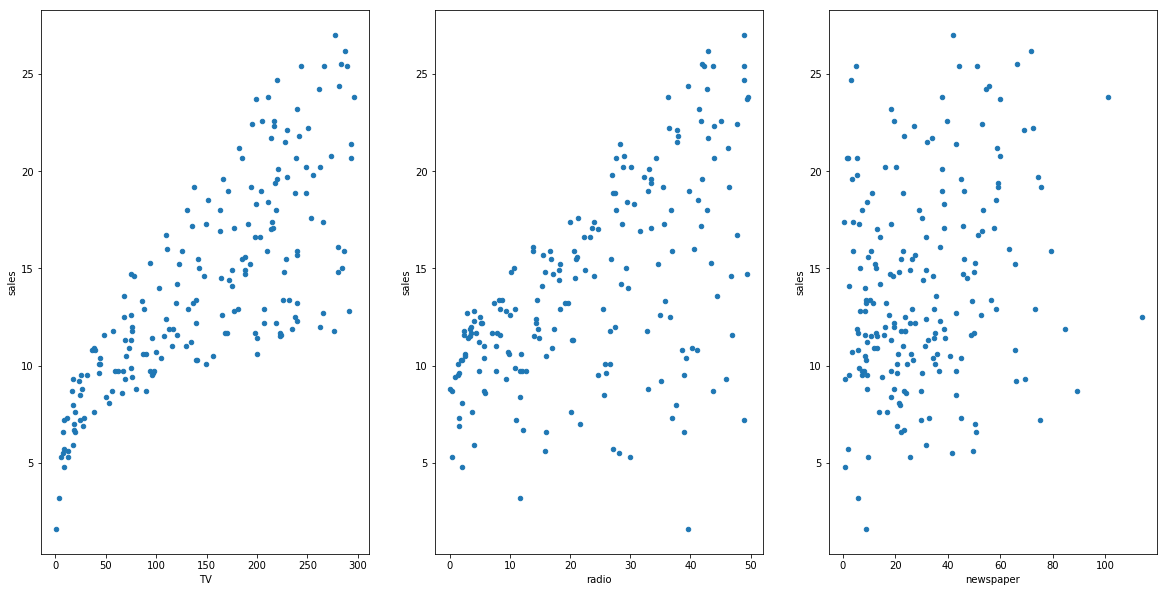

In [5]:
fig,axs=plt.subplots(1,3,sharey=False)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(20,10))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

# Single Variable Linear Regression Models


### Sales & TV

In [6]:
model1=sm.ols(formula='sales~TV',data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        02:57:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

### Sales & newspaper

In [7]:
model2=sm.ols(formula='sales~newspaper',data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 07 Feb 2019   Prob (F-statistic):            0.00115
Time:                        02:57:17   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

### Sales & radio 

In [8]:
model3=sm.ols(formula='sales~radio',data=df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           4.35e-19
Time:                        02:57:17   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

Since the p-values are really small, we can suspect that there is some relationship between sales and each of the channels. But, the $R^2$ values are really low, so the model fit is unlikely to be good.

# Plotting the models 

In [9]:
x1=pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})
pred1=model1.predict(x1)
x2=pd.DataFrame({'newspaper':[df.newspaper.min(),df.newspaper.max()]})
pred2=model2.predict(x2)
x3=pd.DataFrame({'radio':[df.radio.min(),df.radio.max()]})
pred3=model3.predict(x3)


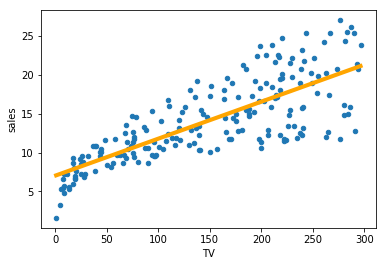

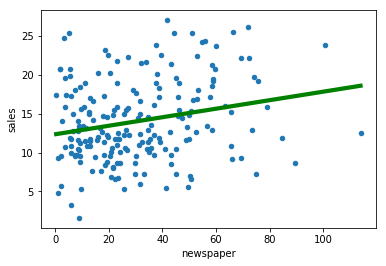

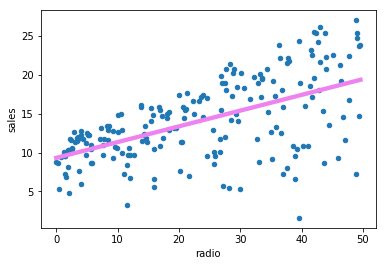

In [10]:
df.plot(kind='scatter',x='TV',y='sales')
plt.plot(x1,pred1,c='orange',linewidth=4.1)
df.plot(kind='scatter',x='newspaper',y='sales')
plt.plot(x2,pred2,c='green',linewidth=4.2)
df.plot(kind='scatter',x='radio',y='sales')
plt.plot(x3,pred3,c='violet',linewidth=4.3)


# Multiple Linear Regression 

In [11]:
model=sm.ols(formula='sales~TV+newspaper+radio',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.58e-96
Time:                        02:57:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

# Further Comparisions 

In [12]:
model4=sm.ols(formula='sales~TV+radio',data=df).fit()
model5=sm.ols(formula='sales~TV+radio+newspaper',data=df).fit()
print("Sales~TV+Radio, Rsquared: {} \n Sales~TV+radio+newspaper, Rsquared: {}".format(model4.rsquared,model5.rsquared))

Sales~TV+Radio, Rsquared: 0.8971942610828956 
 Sales~TV+radio+newspaper, Rsquared: 0.8972106381789522


So, newspaper doesn't really imporve the fit of the linear model, as we can see by looking at Rsquared values above.

### Correlation Matrix

In [13]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


# Visualising the Multiple Regression model (TV+Radio)


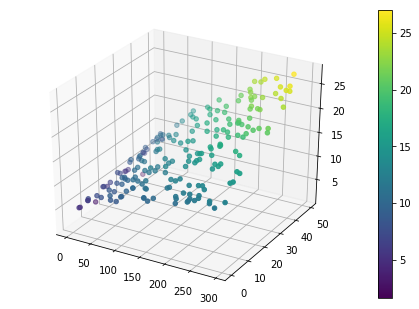

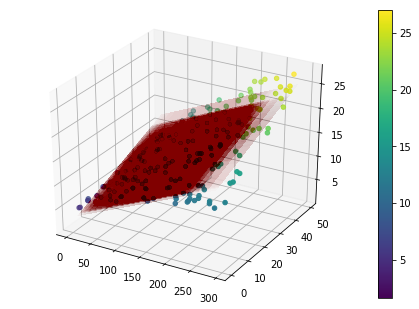

In [15]:
fig1 = plt.figure()
ax1 = Axes3D(fig1)
a=ax1.scatter(np.array(df['TV']),np.array(df['radio']),np.array(df['sales']),c=np.array(df['sales']))
cbar=plt.colorbar(a)
fig2 = plt.figure()
ax2 = Axes3D(fig2)
a=ax2.scatter(np.array(df['TV']),np.array(df['radio']),np.array(df['sales']),c=np.array(df['sales']))
cbar=plt.colorbar(a)
x, y = np.meshgrid(np.array(df['TV']),np.array(df['radio']))
z = model4.params[0]+(model4.params[1]*x)+(model4.params[2]*y)
ax2.plot_surface(x,y,z,color='red',alpha=0.002)